# Logistic Regression with Python

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data
train = pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Part 1: Exploratory Data Analysis

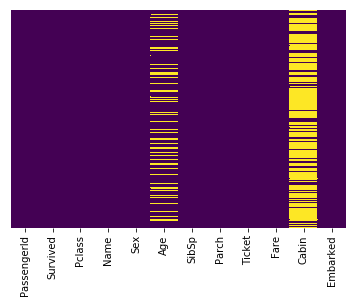

In [3]:
# Create heatmap to check missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
sns.set_style('whitegrid')

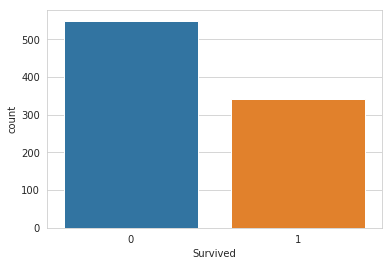

In [5]:
# Get a count of observations for each class in the training data set
sns.countplot(x='Survived',data=train)

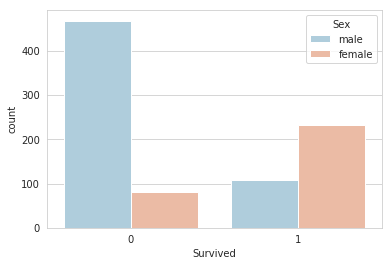

In [6]:
# Below countplot gives a rough correlation between sex and possibility of survival
sns.countplot(x='Survived',data=train,hue="Sex",palette='RdBu_r')

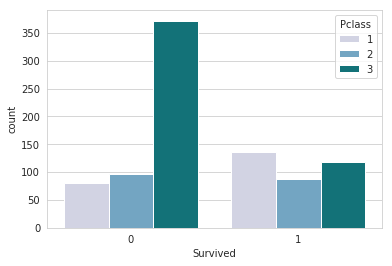

In [7]:
# Below countplot gives a rough correlation between Pclass i.e. passenger class and possibility of survival
sns.countplot(x='Survived',data=train,hue="Pclass",palette='PuBuGn')

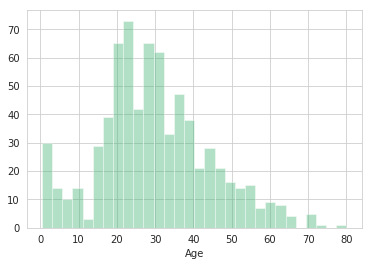

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30,color="mediumseagreen")

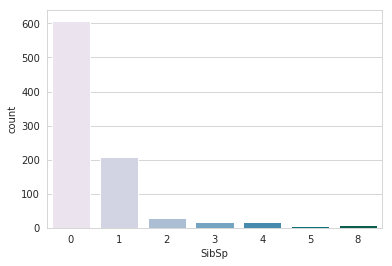

In [9]:
# SibSp - number of siblings/spouses on board
sns.countplot(x="SibSp",data=train,palette="PuBuGn")

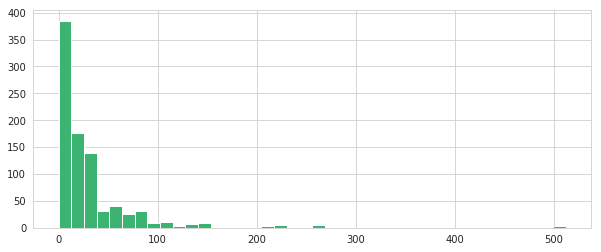

In [10]:
# Distribution of fare
train['Fare'].hist(color="mediumseagreen",bins=40,figsize=(10,4))

## Part 2: Data Cleaning and Handling Missing Data

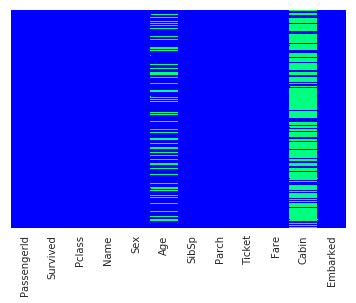

In [11]:
# Create heatmap to check missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='winter')

#### One way to fill in the missing age data is to fill in the missing values with the average passenger age. This is know as imputation. We can also find the average age by passenger class and use that to fill in corressponding missing age data.

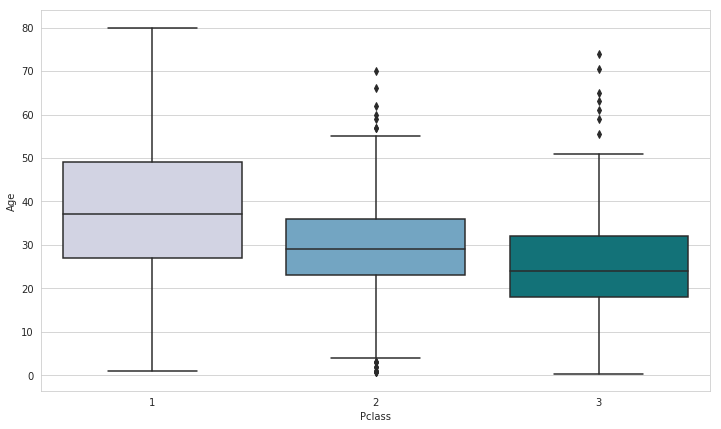

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train,palette="PuBuGn")

In [13]:
# Applying imputation
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 22
    else:
        return Age

In [14]:
# axis = 1 signifies function is to be applied across columns
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

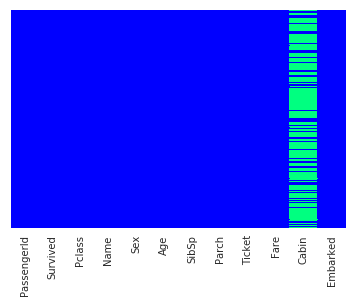

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='winter')

In [16]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train.dropna(inplace=True)

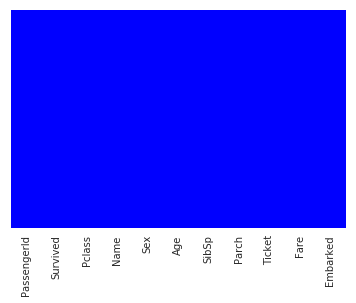

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='winter')

## Part 2: Creating Indicator Variables from Categorical Features

In [19]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [20]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [21]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
train.drop(['PassengerId'],axis=1,inplace=True)

## Part 3: Training the model and using it to run predictions

In [23]:
# Prepare the data
X = train.drop('Survived', axis=1)
y = train['Survived']

In [24]:
# Imports
from sklearn.cross_validation import train_test_split

In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [26]:
# Import sklearn model
from sklearn.linear_model import LogisticRegression

In [27]:
# Initializing the model
logmodel = LogisticRegression()

In [28]:
# Training the model
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# Predict
predictions = logmodel.predict(X_test)

In [30]:
# classification_report evaluates your classification model by giving precision, recall value, accuracy etc.
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [33]:
# Or you can impot and evaluate your model using the actual confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]])